# Users analysis

This notebook explores the users behaviors. It provides metrics and plots to evaluate their behavior.
This study is useful to have a global picture of the work and to set the bases for testing the approach on a user

## Imports

In [1]:
import pandas as pd

from statsmodels.distributions.empirical_distribution import ECDF

from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

## Load data

In [2]:
static_metrics = pd.read_csv('data/static_metrics_and_kmeans.csv')

In [3]:
users_analysis = static_metrics.groupby(["user"])["logical job name"].nunique()

In [4]:
users_analysis.sort_values(ascending=False).head(10)

user
QhKaMUnHYqtG1RJkmo+zqhY1dChfuOZ6oy8jYGDlsic=    1391
njTE8BZMxQTFTmz+xeDNc6MGCjP2WhS6B4xK9+rTh8E=     843
E+9U+J1Dicd5PJklbq2e5THQ29X6D8jmqQ0Zu53Kc+o=     842
mbrS6V2tRbksMPO0y8EI9B9XT2ASaPRTNndslCGN/2A=     452
HBL13RkuP8hPfuPHZHIJTQZkoEtBdUQ9gtpKwGmSfJc=     438
oPxcKd7feXmw+sZKrkp8/MvvNP/5kRG+Yy2fc/lz3Ks=     405
8OkMisyvwLRFV8wxW85Psk0o/my2wpLBMFuoz4pvotY=     396
TpvNZQVOGF/Vr5q+Ka/froHMRlTulp4VfsBSHqvMnws=     383
fJYeclskJqPWsAT6TX/r9X5OiIZpSEb2PBGliYAOMxM=     345
68CsCZngOkuQn5lVo+dNXKGoFx9ZmJXWR+W7NAUmEH4=     274
Name: logical job name, dtype: int64

### K-Means = 2

In [5]:
users_analysis = static_metrics.reset_index()

In [6]:
kmeans_2_users_series = users_analysis.groupby(["user", "K-Means = 2"]).size()

In [7]:
kmeans_users = kmeans_2_users_series.to_frame(name = 'K=2 cluster size').reset_index()

In [8]:
kmeans2_users = kmeans_users.groupby('user')['K=2 cluster size'].agg([('Max # Occur.', 'max'), ('# Occur.', 'sum')])

In [9]:
kmeans2_users["ratio"] = kmeans2_users['Max # Occur.'] / kmeans2_users['# Occur.']

In [10]:
kmeans2_users = kmeans2_users.sort_values(by=['ratio'])

In [11]:
kmeans2_users

,Max # Occur.,# Occur.,ratio
user,,,
3466F7yof/SNP22sFU7fJymy5MmSemDRI1XLhEv1/Ss=,1,2,0.5
6HjgmHgWtqr2mFQEQ0uLHVgEgtu93tn0rk+xZKdCG4w=,1,2,0.5
1e/20e7805qKhTJQpf5rpFPLognsK62CAAsJtCFGhzg=,1,2,0.5
VselKpjeu6e21XmD5xQ5BRq2irtjn3+YUj+slss3RI0=,2,4,0.5
y9NKAC+Ud/LMV2fx5OqoEDjcCZYAfzpt8i0V/c/y9ik=,1,2,0.5
...,...,...,...
Kium1AXE4T6aJrzjPhoGTjlc0UZzziDQzxoNjdzghso=,1,1,1.0
KearXmkAc07zFELm/8kngVOKcaLr/gW0mGh7pnHcJEM=,4,4,1.0
KLfkuzTDj9yJzDvi/w702sAV9B5Y/nAjb4r3G6bL8P4=,1,1,1.0


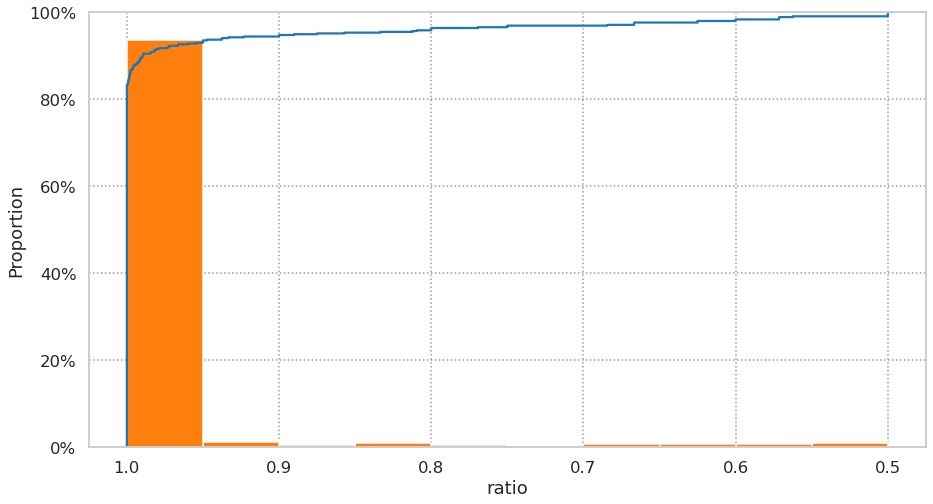

In [12]:
data = kmeans2_users.ratio.sort_values(ascending=False).values

e = ECDF(data)

x = np.linspace(min(data), max(data), 1000)
y = e(x)

sns.set_context("talk")
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
#plt.clf()
plt.figure(figsize=(15,8))
sns.ecdfplot(x='ratio', data=kmeans2_users, complementary=True)
plt.hist(data, weights=np.ones(len(data)) / len(data))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().invert_xaxis()
#plt.xlim((0.0, 1.05))

### K-Means = 4

In [13]:
kmeans_4_users_series = users_analysis.groupby(["user", "K-Means = 4"]).size()

In [14]:
kmeans_users = kmeans_4_users_series.to_frame(name = 'K=4 cluster size').reset_index()

In [15]:
kmeans4_users = kmeans_users.groupby('user')['K=4 cluster size'].agg([('Max # Occur.', 'max'), ('# Occur.', 'sum')])

In [16]:
kmeans4_users["ratio"] = kmeans4_users['Max # Occur.'] / kmeans4_users['# Occur.']

In [17]:
kmeans4_users = kmeans4_users.sort_values(by=['ratio'])

In [18]:
kmeans4_users

,Max # Occur.,# Occur.,ratio
user,,,
ZsYqoT9GHcVID8JDjPvNk23TZBeQLtIJbLF+oNIdBTY=,1,3,0.333333
rNyxTd1B3RnDJBIofzoVksjnmaJEN+hW5W+yRHo2xsM=,7,16,0.437500
XgDTsFK9tFpZDWGgoGlazp4UXTGNfFd7kqLn8fVeIl4=,5,11,0.454545
KearXmkAc07zFELm/8kngVOKcaLr/gW0mGh7pnHcJEM=,2,4,0.500000
y9NKAC+Ud/LMV2fx5OqoEDjcCZYAfzpt8i0V/c/y9ik=,1,2,0.500000
...,...,...,...
PcQl6eCx40ZmNFcynRhT76hv1Q0bXihz0C5N0DxKq4A=,1,1,1.000000
POTsc+/Ddk1cO1emRZrRSF9+5eodwdgmrONGesIMduc=,3,3,1.000000
PCpbDrD43x1PKq0LMfWjhY+1RvQ93MLQO0/UvtuqSQg=,1,1,1.000000


<Figure size 432x288 with 0 Axes>

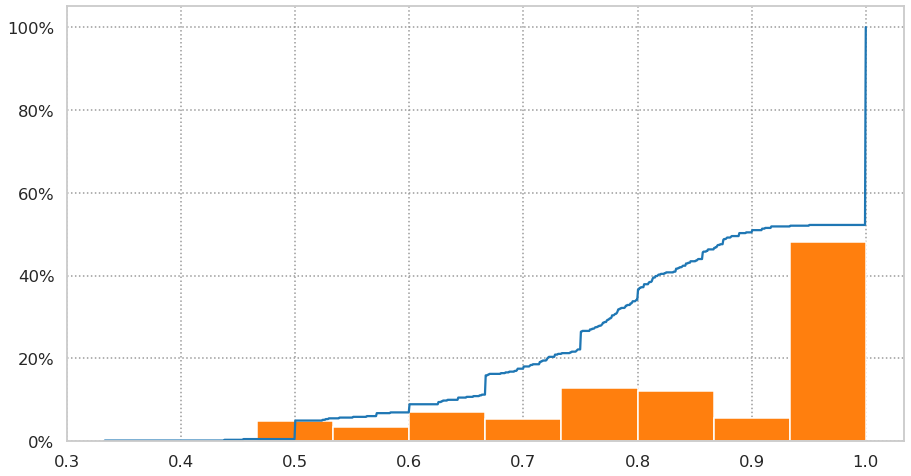

In [19]:
data = kmeans4_users.ratio.values

e = ECDF(data)


x = np.linspace(min(data), max(data), 1000)
y = e(x)

plt.clf()
plt.figure(figsize=(15,8))
plt.plot(x, y)
plt.hist(data, weights=np.ones(len(data)) / len(data))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.xlim((0.0, 1.05))

### K-Means = 6

In [20]:
kmeans_6_users_series = users_analysis.groupby(["user", "K-Means = 6"]).size()

In [21]:
kmeans_users = kmeans_6_users_series.to_frame(name = 'K=6 cluster size').reset_index()

In [22]:
kmeans6_users = kmeans_users.groupby('user')['K=6 cluster size'].agg([('Max # Occur.', 'max'), ('# Occur.', 'sum')])

In [23]:
kmeans6_users["ratio"] = kmeans6_users['Max # Occur.'] / kmeans6_users['# Occur.']

In [24]:
kmeans6_users = kmeans6_users.sort_values(by=['ratio'])

In [25]:
len(kmeans6_users[kmeans6_users["ratio"] > 0.95]) / len(kmeans6_users)

0.43828264758497315

In [26]:
kmeans6_users

,Max # Occur.,# Occur.,ratio
user,,,
7SeHYTk24Do6L12HJKmJ3PGHhvX8AD7xQ9nDSlwlC8Q=,3,10,0.300000
dTBkGCvrIzbJpD3rFqjUp7wz1+pLdgL7xCt64xcZN0o=,5,16,0.312500
EMi+vK0g67XgTaF0rS5KDx363gLWXQI1zJm5Pf4TgmY=,2,6,0.333333
OCt+8F9Kl+AV3viLjnX7tIX5061lJLOXvdzGhcqEGtI=,1,3,0.333333
+SffpzPzB6mHA8bvRv2jrKrBMu2u0xuP7Sp1hCWztr8=,1,3,0.333333
...,...,...,...
Qa3VK/X2IoSeou0RPVShM6BIDRan8y6otNNWefTP8W4=,1,1,1.000000
QSfwBknOx/RxRmMlWyhWT0z8471gBGRw7GIiQVPAVs4=,1,1,1.000000
QNl8ZGPAiYiz+xvxU2JLLFow8QyAsNWBjDOWKq6Ww7A=,1,1,1.000000


<Figure size 432x288 with 0 Axes>

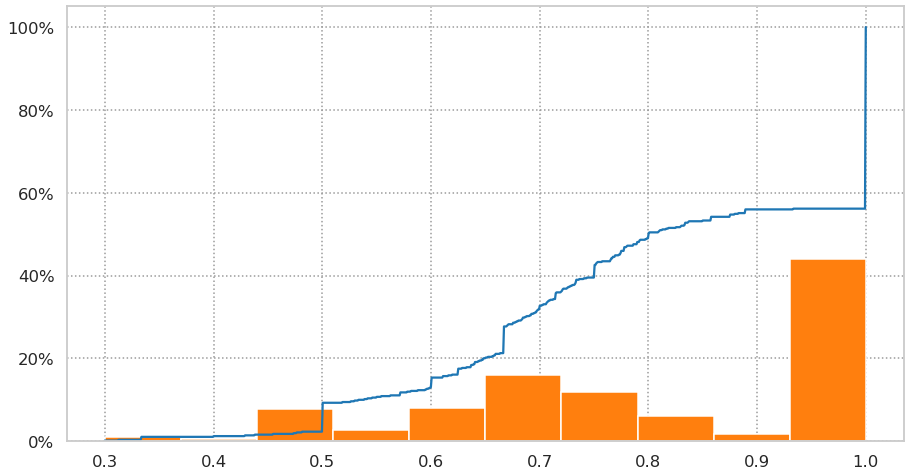

In [27]:
data = kmeans6_users.ratio.values

e = ECDF(data)


x = np.linspace(min(data), max(data), 1000)
y = e(x)

plt.clf()
plt.figure(figsize=(15,8))
plt.plot(x, y)
plt.hist(data, weights=np.ones(len(data)) / len(data))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.xlim((0.0, 1.05))

### K-Means = 8

In [28]:
kmeans_8_users_series = users_analysis.groupby(["user", "K-Means = 8"]).size()

In [29]:
kmeans_users = kmeans_8_users_series.to_frame(name = 'K=8 cluster size').reset_index()

In [30]:
kmeans8_users = kmeans_users.groupby('user')['K=8 cluster size'].agg([('Max # Occur.', 'max'), ('# Occur.', 'sum')])

In [31]:
kmeans8_users["ratio"] = kmeans8_users['Max # Occur.'] / kmeans8_users['# Occur.']

In [32]:
kmeans8_users = kmeans8_users.sort_values(by=['ratio'])

In [33]:
kmeans8_users

,Max # Occur.,# Occur.,ratio
user,,,
VselKpjeu6e21XmD5xQ5BRq2irtjn3+YUj+slss3RI0=,1,4,0.250000
7SeHYTk24Do6L12HJKmJ3PGHhvX8AD7xQ9nDSlwlC8Q=,3,10,0.300000
dTBkGCvrIzbJpD3rFqjUp7wz1+pLdgL7xCt64xcZN0o=,5,16,0.312500
150FoyvGa+7FVhy0fW9eZ8k0v7e80nWIH6jKA0dUHd0=,1,3,0.333333
1s7butOa521p+pNgZ7m4zrvCANGMSqckoDJ6MkrP2lU=,1,3,0.333333
...,...,...,...
RFDjCDTedB2+XRNVvSBm36qok0cWjNDAiAwbN9BLXKo=,6,6,1.000000
Qa3VK/X2IoSeou0RPVShM6BIDRan8y6otNNWefTP8W4=,1,1,1.000000
QSfwBknOx/RxRmMlWyhWT0z8471gBGRw7GIiQVPAVs4=,1,1,1.000000


<Figure size 432x288 with 0 Axes>

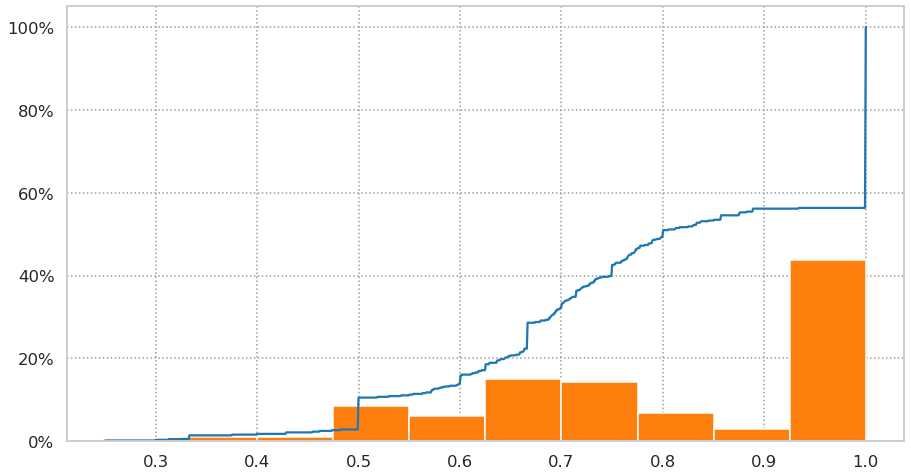

In [34]:
data = kmeans8_users.ratio.values

e = ECDF(data)


x = np.linspace(min(data), max(data), 1000)
y = e(x)

plt.clf()
plt.figure(figsize=(15,8))
plt.plot(x, y)
plt.hist(data, weights=np.ones(len(data)) / len(data))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.xlim((0.0, 1.05))

### K-Means = 10

In [35]:
kmeans_10_users_series = users_analysis.groupby(["user", "K-Means = 10"]).size()

In [36]:
kmeans_users = kmeans_10_users_series.to_frame(name = 'K=10 cluster size').reset_index()

In [37]:
kmeans10_users = kmeans_users.groupby('user')['K=10 cluster size'].agg([('Max # Occur.', 'max'), ('# Occur.', 'sum')])

In [38]:
kmeans10_users["ratio"] = kmeans10_users['Max # Occur.'] / kmeans10_users['# Occur.']

In [39]:
kmeans10_users = kmeans10_users.sort_values(by=['ratio'])

In [40]:
kmeans10_users

,Max # Occur.,# Occur.,ratio
user,,,
VselKpjeu6e21XmD5xQ5BRq2irtjn3+YUj+slss3RI0=,1,4,0.250000
WUnEyXtShIcHIJfv4VQml8V5Myr4F35hdElNmSmgaO4=,4,14,0.285714
7SeHYTk24Do6L12HJKmJ3PGHhvX8AD7xQ9nDSlwlC8Q=,3,10,0.300000
dTBkGCvrIzbJpD3rFqjUp7wz1+pLdgL7xCt64xcZN0o=,5,16,0.312500
uso1DyssNEtegq/VZnXheIHmIOyfBxd3zdE0/bbA0Ns=,2,6,0.333333
...,...,...,...
RhvHT3w1FJPk+ffa5F6xLXhD4LsykQfulu1ShcKMUgk=,2,2,1.000000
RQog5ZhkPWBMjAts7RXfL5EzEx98NVe8uXiFSCs1Ayg=,1,1,1.000000
RHHMq7pbHpZL2AOFlt+vzWBFnC8art2/UFhJ5HWzpJI=,1,1,1.000000


In [41]:
kmeans10_users.sort_values(by="# Occur.", ascending=False).head(10)

,Max # Occur.,# Occur.,ratio
user,,,
r/Al6kYJOwZITr6wi4pAlEwyGv5TM2EkJ8woA5hszeA=,7237,9722,0.744394
68CsCZngOkuQn5lVo+dNXKGoFx9ZmJXWR+W7NAUmEH4=,4716,6979,0.675742
F2+Gv53Pxd4KDRb/UsGECThH/XUOpcWKElUXJkhkt1c=,2898,3962,0.731449
njTE8BZMxQTFTmz+xeDNc6MGCjP2WhS6B4xK9+rTh8E=,2103,3367,0.624592
E+9U+J1Dicd5PJklbq2e5THQ29X6D8jmqQ0Zu53Kc+o=,1871,2538,0.737195
ZpQmujQYX55FcN2RFvqqUkcz5z/Tovj2FaG8sFtlG48=,1821,2511,0.725209
oPxcKd7feXmw+sZKrkp8/MvvNP/5kRG+Yy2fc/lz3Ks=,1373,2055,0.668127
nHinWYr2Nep8Mr79MMvmYCrGb0NdshyX6mlnZo/Ot+I=,940,1591,0.590823
0r3naaX+ybfsUIahb35AvYPC6MarnPhbqkAtRJor0xE=,938,1577,0.594800


In [42]:
from statsmodels.distributions.empirical_distribution import ECDF

<Figure size 432x288 with 0 Axes>

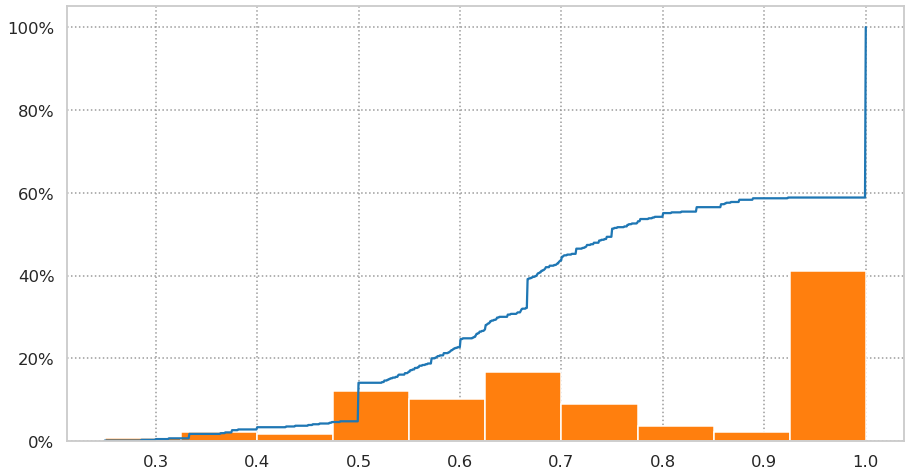

In [43]:
from matplotlib.ticker import PercentFormatter

data = kmeans10_users.ratio.values

e = ECDF(data)


x = np.linspace(min(data), max(data), 1000)
y = e(x)

plt.clf()
plt.figure(figsize=(15,8))
plt.plot(x, y)
plt.hist(data, weights=np.ones(len(data)) / len(data))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.xlim((0.0, 1.05))

### K-Means - summary

In [44]:
kmeans2_users['k'] = 'k = 2'
kmeans4_users['k'] = 'k = 4'
kmeans6_users['k'] = 'k = 6'
kmeans8_users['k'] = 'k = 8'
kmeans10_users['k'] = 'k = 10'

In [45]:
kmeans_users = kmeans2_users
kmeans_users = kmeans_users.append(kmeans4_users)
kmeans_users = kmeans_users.append(kmeans6_users)
kmeans_users = kmeans_users.append(kmeans8_users)
kmeans_users = kmeans_users.append(kmeans10_users)

In [46]:
kmeans_users.reset_index(inplace=True)
kmeans_users

,user,Max # Occur.,# Occur.,ratio,k
0,3466F7yof/SNP22sFU7fJymy5MmSemDRI1XLhEv1/Ss=,1,2,0.5,k = 2
1,6HjgmHgWtqr2mFQEQ0uLHVgEgtu93tn0rk+xZKdCG4w=,1,2,0.5,k = 2
2,1e/20e7805qKhTJQpf5rpFPLognsK62CAAsJtCFGhzg=,1,2,0.5,k = 2
3,VselKpjeu6e21XmD5xQ5BRq2irtjn3+YUj+slss3RI0=,2,4,0.5,k = 2
4,y9NKAC+Ud/LMV2fx5OqoEDjcCZYAfzpt8i0V/c/y9ik=,1,2,0.5,k = 2
...,...,...,...,...,...
2790,RhvHT3w1FJPk+ffa5F6xLXhD4LsykQfulu1ShcKMUgk=,2,2,1.0,k = 10
2791,RQog5ZhkPWBMjAts7RXfL5EzEx98NVe8uXiFSCs1Ayg=,1,1,1.0,k = 10
2792,RHHMq7pbHpZL2AOFlt+vzWBFnC8art2/UFhJ5HWzpJI=,1,1,1.0,k = 10
2793,WmiquVwRCnIgI3Xrf5Q1AEFhqb2Jio5jgsnZhuIzPiY=,1,1,1.0,k = 10


In [47]:
kmeans_users[kmeans_users.k == "k = 2"].sort_values(by="ratio", ascending=False).head(50)

,user,Max # Occur.,# Occur.,ratio,k
279,rRn2y23mwxzPDHmhoutfKbtr7POIEA1vgsEsAbG0UvI=,1,1,1.0,k = 2
375,01B/AOjE02qBWt8YtZ1JWy7IG5LIf1FU6YSPUvJmcgA=,1,1,1.0,k = 2
369,0ZcSCdb4ifZ3Up8f6jCMnCwKHgurTCcr2DKzXVIJ+L0=,1,1,1.0,k = 2
370,0ME/LuGHecbhmER6rSMa6ft9lMBLeE6PVVsUV0yN1Xs=,8,8,1.0,k = 2
371,0FF7yTx9oKW0VC+EDuhlL7indf4s8rj82Yq19Hfno6c=,1,1,1.0,k = 2
372,0F+EjmT5vhADVkIVNsa6F6srRjgWFpOcoraqNzaqxWI=,3,3,1.0,k = 2
373,0DNkQ6zoNKw7WZiGlrGjkPpVplGkinAfFRWmLqFjlqQ=,4,4,1.0,k = 2
374,07YMt+54AmVeMivAZ6AgIC+yR4U1ALbWtJbiJtFzxJY=,2,2,1.0,k = 2
376,/uZPM6btSBXkzq5Oa1qat4e4+dpATiXyzt/XXa1vErQ=,6,6,1.0,k = 2
384,/DWNzLUYt1b87cIWYd0vW5P9iNmPH8XdJVuqbOl+e4o=,5,5,1.0,k = 2


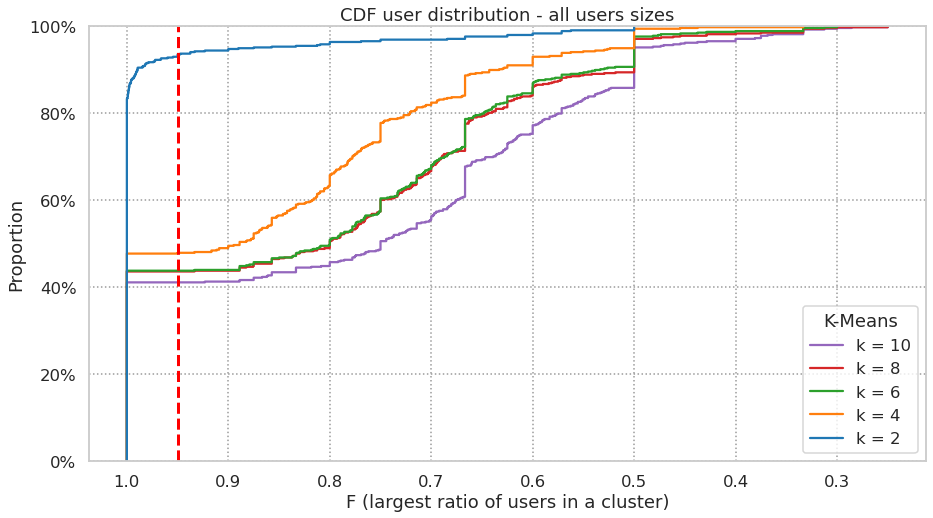

In [48]:

sns.set_context("talk")
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
#plt.clf()
plt.figure(figsize=(15,8))
ecdf_summary = sns.ecdfplot(x='ratio', data=kmeans_users, complementary=True, hue='k')
ecdf_summary.legend(['k = 10', 'k = 8', 'k = 6', 'k = 4', 'k = 2'], title="K-Means", loc=4)
plt.axvline(0.95, c="red", linestyle="--", lw=3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_minor_formatter(PercentFormatter(1))
plt.gca().invert_xaxis()
plt.xlabel("F (largest ratio of users in a cluster)")
plt.title("CDF user distribution - all users sizes")
plt.savefig('figures/2021-11-28-presentation/users_distribution.svg')

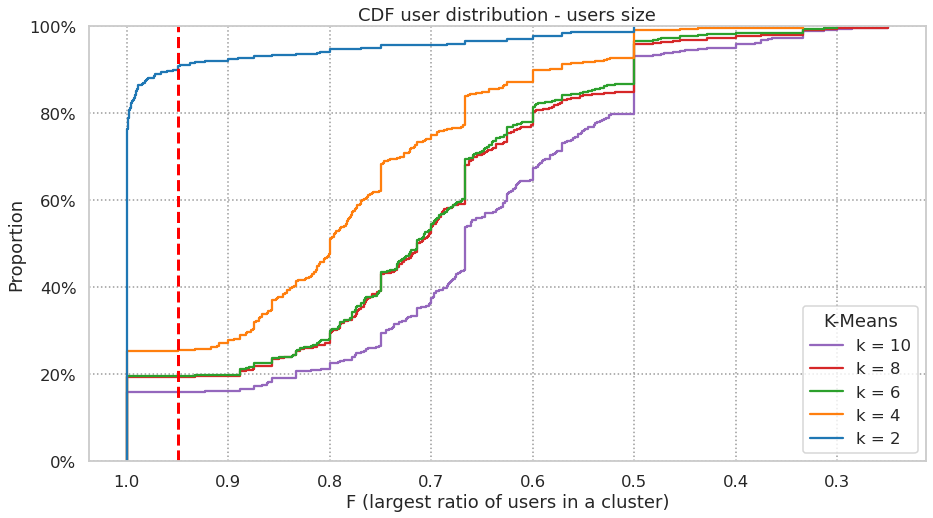

In [49]:

sns.set_context("talk")
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
#plt.clf()
plt.figure(figsize=(15,8))
ecdf_summary = sns.ecdfplot(x='ratio', data=kmeans_users[kmeans_users["# Occur."] > 1], complementary=True, hue='k')
ecdf_summary.legend(['k = 10', 'k = 8', 'k = 6', 'k = 4', 'k = 2'], title="K-Means", loc=4)
plt.axvline(0.95, c="red", linestyle="--", lw=3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_minor_formatter(PercentFormatter(1))
plt.gca().invert_xaxis()
plt.xlabel("F (largest ratio of users in a cluster)")
plt.title("CDF user distribution - users size")
plt.savefig('figures/2021-11-28-presentation/users_distribution_gt1.svg')

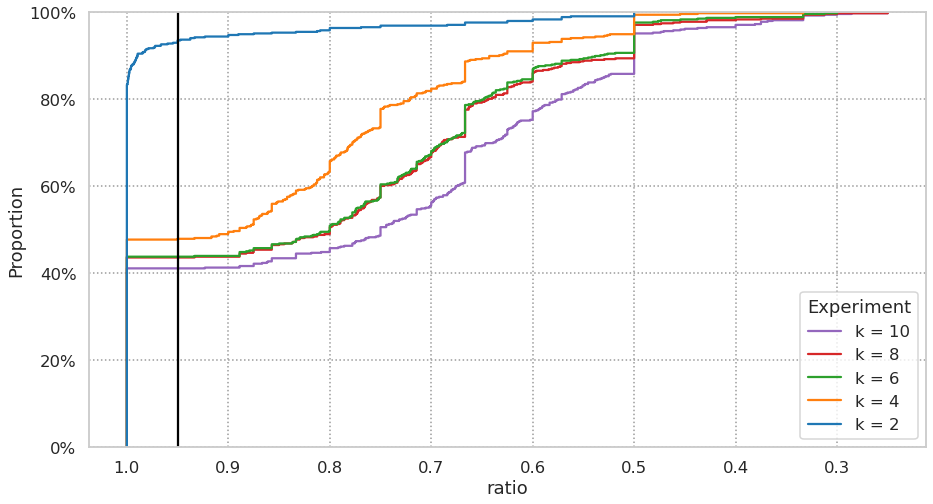

In [54]:
sns.set_context("talk")
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
#plt.clf()
plt.figure(figsize=(15,8))
ecdf_summary = sns.ecdfplot(x='ratio', data=kmeans_users[kmeans_users["# Occur."] > 0], complementary=True, hue='k')
ecdf_summary.legend(['k = 10', 'k = 8', 'k = 6', 'k = 4', 'k = 2'], title="Experiment", loc=4)
plt.axvline(0.95, c="black")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_minor_formatter(PercentFormatter(1))
plt.gca().invert_xaxis()
plt.savefig('figures/2021-11-28-presentation/users_distribution.svg')

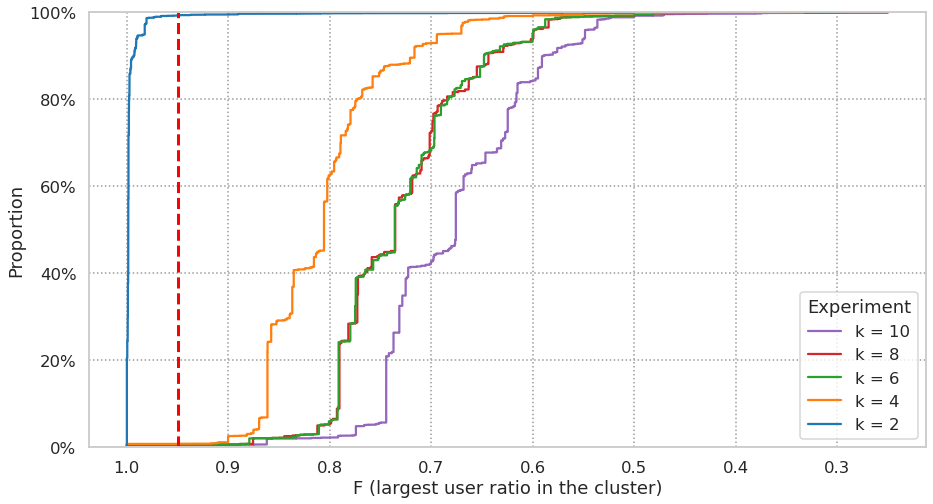

In [55]:

sns.set_context("talk")
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
#plt.clf()
plt.figure(figsize=(15,8))
ecdf_summary = sns.ecdfplot(x='ratio', data=kmeans_users, complementary=True, hue='k', weights="# Occur.")
ecdf_summary.legend(['k = 10', 'k = 8', 'k = 6', 'k = 4', 'k = 2'], title="Experiment", loc=4)
plt.axvline(0.95, c="red", linestyle="--", lw=3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_minor_formatter(PercentFormatter(1))
plt.gca().invert_xaxis()
plt.xlabel("F (largest user ratio in the cluster)")

plt.savefig('figures/2021-11-28-presentation/users_distribution_weighted-usr-workload.svg')

In [56]:
kmeans_users[(kmeans_users['k'] == 'k = 10') & (kmeans_users.ratio >= 1)].sort_values(by='# Occur.')

,user,Max # Occur.,# Occur.,ratio,k
2679,/fKjwmHNKsivHULxcv1kE6weSve/Qn/SLa2e2p83Vlk=,1,1,1.0,k = 10
2674,0FF7yTx9oKW0VC+EDuhlL7indf4s8rj82Yq19Hfno6c=,1,1,1.0,k = 10
2767,MpXptvWHFX8sdm4inETvRNOLsnfoOB0AC+KLzfudef4=,1,1,1.0,k = 10
2676,01B/AOjE02qBWt8YtZ1JWy7IG5LIf1FU6YSPUvJmcgA=,1,1,1.0,k = 10
2677,/nwTxUpQUh7a1ZvViEs8k9UXPCnwiXSCuAHM/2B5omE=,1,1,1.0,k = 10
...,...,...,...,...,...
2616,xB4921PejKgfw0K8TIcTPelK+O7Csa8c3bMINHjWky4=,6,6,1.0,k = 10
2775,RFDjCDTedB2+XRNVvSBm36qok0cWjNDAiAwbN9BLXKo=,6,6,1.0,k = 10
2704,3PF0/VxH7vMzg6nj3l4Xmhbo2+5HSDbzCKKpZ9OQ1bk=,7,7,1.0,k = 10
2715,bN1icvlVqinNxTO68265xMGsaQwwF2av94Ns6xmFSw0=,7,7,1.0,k = 10


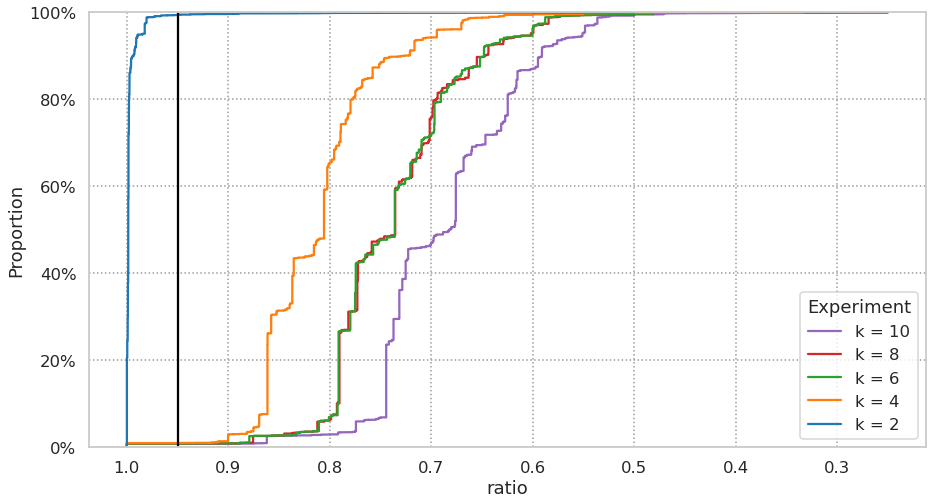

In [57]:
sns.set_context("talk")
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
#plt.clf()
plt.figure(figsize=(15,8))
ecdf_summary = sns.ecdfplot(x='ratio', data=kmeans_users, complementary=True, hue='k', weights="Max # Occur.")
ecdf_summary.legend(['k = 10', 'k = 8', 'k = 6', 'k = 4', 'k = 2'], title="Experiment", loc=4)
plt.axvline(0.95, c="black")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_minor_formatter(PercentFormatter(1))
plt.gca().invert_xaxis()
#plt.savefig('figures/2021-11-28-presentation/users_distribution_weighted-usr-workload.svg')

In [58]:
kmeans_users[(kmeans_users['k'] == 'k = 10') & (kmeans_users.ratio >= 0.9)]['Max # Occur.'].mean()

1.5757575757575757

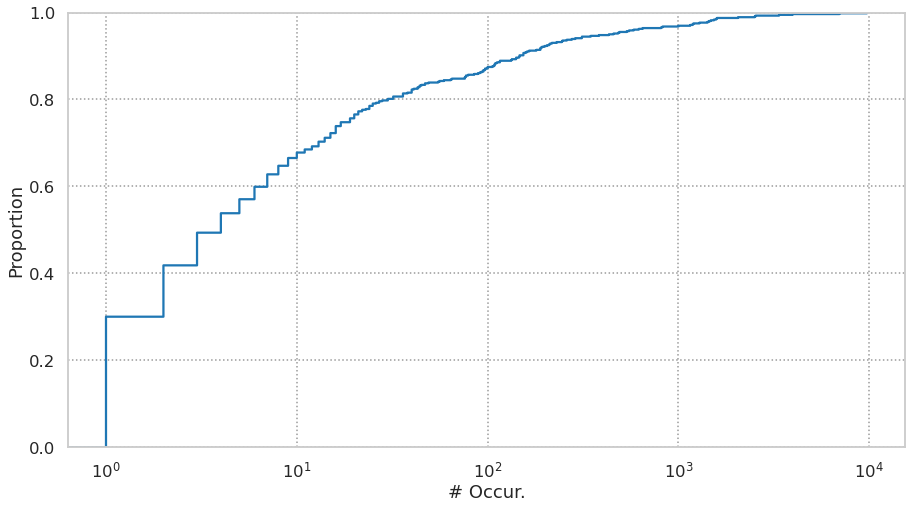

In [59]:
sns.set_context("talk")
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
#plt.clf()
plt.figure(figsize=(15,8))
ecdf_summary = sns.ecdfplot(x='# Occur.', data=kmeans_users)
#ecdf_summary.legend(['k = 10', 'k = 8', 'k = 6', 'k = 4', 'k = 2'], title="Experiment", loc=4)
plt.xscale('log')
#plt.axvline(0.95, c="black")
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.gca().invert_xaxis()

### K-Means - summary

In [61]:
ljn_analysis = static_metrics.reset_index()

target_metric="logical job name"

cdf_df = ljn_analysis.groupby([target_metric, "K-Means = 10"]).size()
cdf_df = cdf_df.to_frame()
cdf_df.columns = ["value size"]
cdf_df
#static_metrics
cdf_df = cdf_df.groupby(target_metric)['value size'].agg([('Max # Occur.', 'max'), ('# Occur.', 'sum')])


cdf_df["ratio"] = cdf_df['Max # Occur.'] / cdf_df['# Occur.']
cdf_df['k'] = 'k = 10'
cdf_df_total = cdf_df.copy()

for k in range(2, 10, 2):
    cdf_df = ljn_analysis.groupby([target_metric, f"K-Means = {k}"]).size()
    cdf_df = cdf_df.to_frame()
    cdf_df.columns = ["value size"]
    cdf_df
    #static_metrics
    cdf_df = cdf_df.groupby(target_metric)['value size'].agg([('Max # Occur.', 'max'), ('# Occur.', 'sum')])


    cdf_df["ratio"] = cdf_df['Max # Occur.'] / cdf_df['# Occur.']
    cdf_df['k'] = f'k = {k}'
    cdf_df_total = cdf_df_total.append(cdf_df)

cdf_df_total["k"] = pd.Categorical(cdf_df_total["k"], categories=[f"k = {k}" for k in range(2, 12, 2)])

cdf_df_total.reset_index(inplace=True)

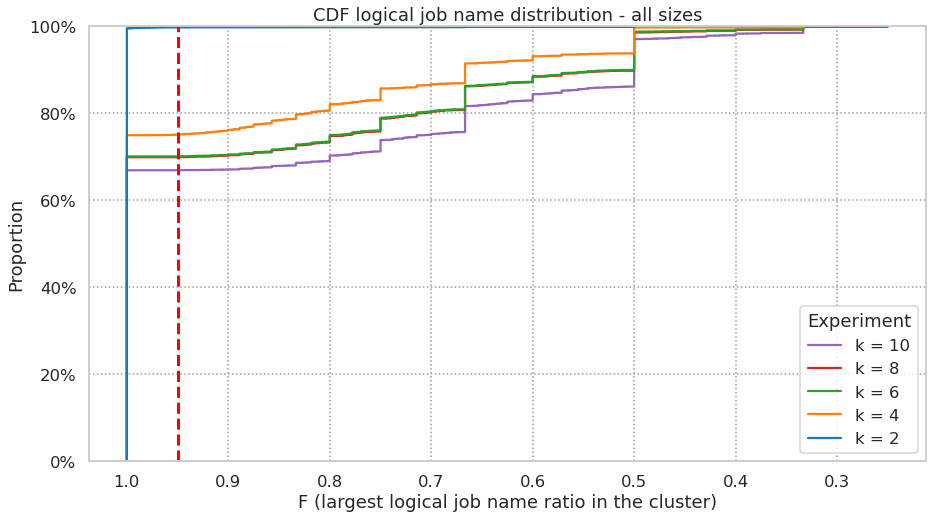

In [62]:
sns.set_context("talk")
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

plt.figure(figsize=(15,8))
ecdf_summary = sns.ecdfplot(x='ratio', data=cdf_df_total, complementary=True, hue='k')
ecdf_summary.legend(['k = 10', 'k = 8', 'k = 6', 'k = 4', 'k = 2'], title="Experiment", loc=4)
plt.axvline(0.95, c="red", linestyle="--", lw=3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_minor_formatter(PercentFormatter(1))
plt.gca().invert_xaxis()
plt.title("CDF logical job name distribution - all sizes")
plt.xlabel("F (largest logical job name ratio in the cluster)")

plt.savefig('figures/2021-11-28-presentation/logical_job_name_distribution.svg')

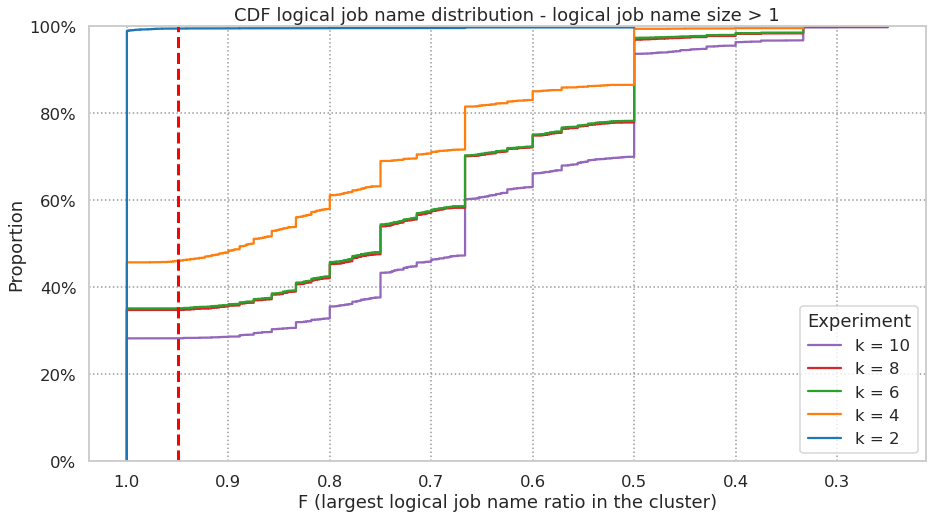

In [63]:
sns.set_context("talk")
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

plt.figure(figsize=(15,8))
ecdf_summary = sns.ecdfplot(x='ratio', data=cdf_df_total[cdf_df_total["# Occur."] > 1], complementary=True, hue='k')
ecdf_summary.legend(['k = 10', 'k = 8', 'k = 6', 'k = 4', 'k = 2'], title="Experiment", loc=4)
plt.axvline(0.95, c="red", linestyle="--", lw=3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_minor_formatter(PercentFormatter(1))
plt.gca().invert_xaxis()
plt.title("CDF logical job name distribution - logical job name size > 1")
plt.xlabel("F (largest logical job name ratio in the cluster)")

plt.savefig('figures/2021-11-28-presentation/logical_job_name_distribution_gt1.svg')

In [64]:
cdf_df_total.sort_values(by="# Occur.").tail(100)

,logical job name,Max # Occur.,# Occur.,ratio,k
16389,RfQ/XZs68BkB9UwJNf0YK1rt2SSwD/DSIZa1cMtfba8=,412,413,0.997579,k = 2
5213,RfQ/XZs68BkB9UwJNf0YK1rt2SSwD/DSIZa1cMtfba8=,306,413,0.740920,k = 10
27565,RfQ/XZs68BkB9UwJNf0YK1rt2SSwD/DSIZa1cMtfba8=,336,413,0.813559,k = 4
38741,RfQ/XZs68BkB9UwJNf0YK1rt2SSwD/DSIZa1cMtfba8=,321,413,0.777240,k = 6
49917,RfQ/XZs68BkB9UwJNf0YK1rt2SSwD/DSIZa1cMtfba8=,321,413,0.777240,k = 8
...,...,...,...,...,...
23148,2N2Ubknr/Ly7V95poeYFNAXQISDBZ8iSTPs6KaZ1wQw=,1731,2073,0.835022,k = 4
34324,2N2Ubknr/Ly7V95poeYFNAXQISDBZ8iSTPs6KaZ1wQw=,1607,2073,0.775205,k = 6
796,2N2Ubknr/Ly7V95poeYFNAXQISDBZ8iSTPs6KaZ1wQw=,1510,2073,0.728413,k = 10
11972,2N2Ubknr/Ly7V95poeYFNAXQISDBZ8iSTPs6KaZ1wQw=,2072,2073,0.999518,k = 2


In [65]:
len(kmeans_users['user'].unique())

559

In [66]:
len(cdf_df_total['logical job name'].unique())

11176

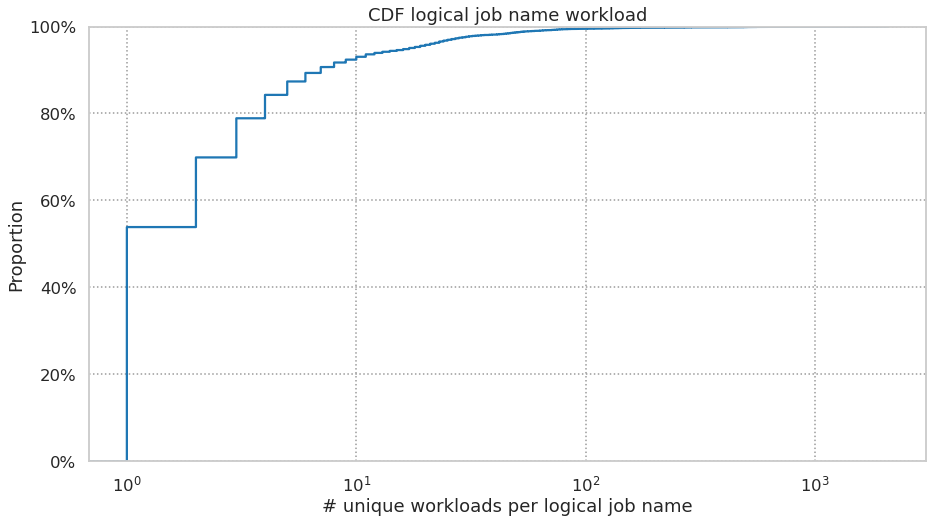

In [67]:
import matplotlib as mpl

sns.set_context("talk")
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})


plt.figure(figsize=(15,8))
ecdf_summary = sns.ecdfplot(x='# Occur.', data=cdf_df_total[cdf_df_total['k'] == 'k = 2'])
plt.title("CDF logical job name workload")
plt.xlabel("# unique workloads per logical job name")
ecdf_summary.set_xscale('log')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_minor_formatter(PercentFormatter(1))

plt.gca().xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10))

plt.grid(b=True, which='minor', color='w', linewidth=0.5)

plt.savefig('figures/2021-11-28-presentation/logical_job_name_workload_CDF.svg')

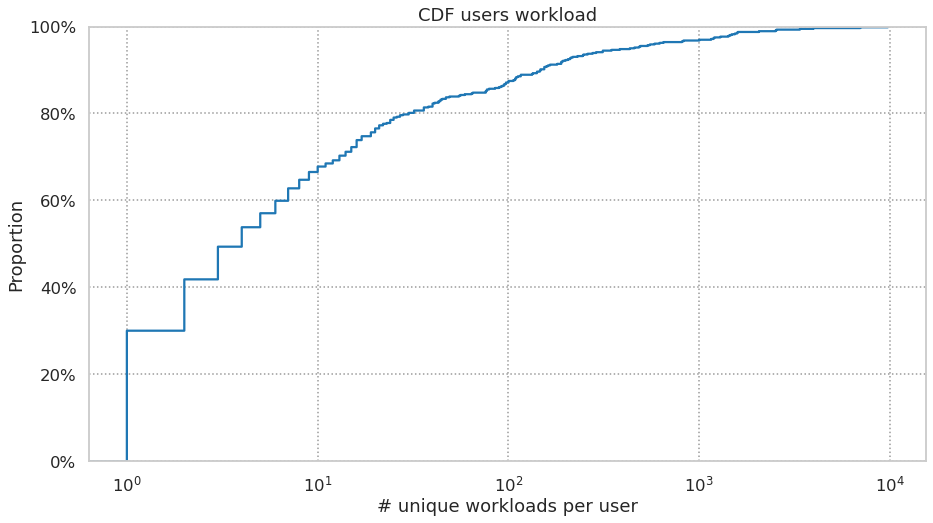

In [68]:
sns.set_context("talk")
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})


plt.figure(figsize=(15,8))
ecdf_summary = sns.ecdfplot(x='# Occur.', data=kmeans_users[kmeans_users['k'] == 'k = 2'])
plt.title("CDF users workload")
plt.xlabel("# unique workloads per user")
ecdf_summary.set_xscale('log')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_minor_formatter(PercentFormatter(1))

plt.savefig('figures/2021-11-28-presentation/user_workload_CDF.svg')

## Watermark

In [69]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2022-01-25T16:09:21.310323+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 4.18.0-193.28.1.el8_2.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 80
Architecture: 64bit

seaborn   : 0.11.0
numpy     : 1.21.2
pandas    : 1.3.5
matplotlib: 3.4.3

